In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
pd.set_option('display.max_columns', None)

In [3]:
df = pd.read_csv('gurgaon_properties_missing_value_imputation.csv')

In [4]:
df.shape

(3554, 18)

In [5]:
df.head()

,property_type,society,sector,price,price_per_sqft,bedRoom,bathroom,balcony,floorNum,agePossession,built_up_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
0,flat,signature global solera,sector 107,0.50,7752.0,3,2,2,6.0,Relatively New,717.0,0,0,0,0,1,0,15
1,flat,green court,sector 90,0.47,6812.0,2,2,1,0.0,New Property,767.0,0,0,0,0,0,0,49
2,flat,vatika gurgaon,sector 83,1.19,7438.0,3,3,2,10.0,Relatively New,1778.0,0,1,0,0,0,1,35
3,flat,emaar mgf the palm drive,sector 66,1.51,15130.0,2,2,2,5.0,Relatively New,1188.0,0,0,0,1,0,1,82
4,flat,emaar digihomes,sector 62,2.15,14257.0,2,2,3,31.0,Under Construction,1676.0,0,0,0,0,0,0,101


Since among the most common features people select on websites for real estates are sector, price and area. Society and price per unit area is not important for now so these columns are being dropped

In [6]:
train_df = df.drop(columns=['society','price_per_sqft'])

In [7]:
train_df.head()

,property_type,sector,price,bedRoom,bathroom,balcony,floorNum,agePossession,built_up_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
0,flat,sector 107,0.50,3,2,2,6.0,Relatively New,717.0,0,0,0,0,1,0,15
1,flat,sector 90,0.47,2,2,1,0.0,New Property,767.0,0,0,0,0,0,0,49
2,flat,sector 83,1.19,3,3,2,10.0,Relatively New,1778.0,0,1,0,0,0,1,35
3,flat,sector 66,1.51,2,2,2,5.0,Relatively New,1188.0,0,0,0,1,0,1,82
4,flat,sector 62,2.15,2,2,3,31.0,Under Construction,1676.0,0,0,0,0,0,0,101


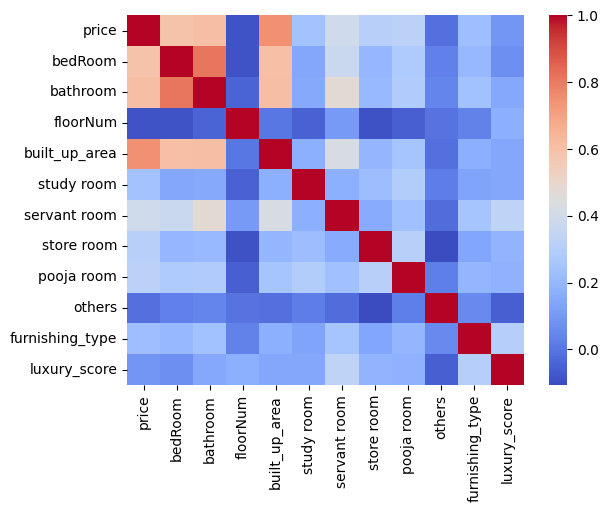

In [10]:
sns.heatmap(train_df.select_dtypes(include=[np.number]).corr(), annot=False, cmap='coolwarm')
plt.show()

In [12]:
train_df.select_dtypes(include=[np.number]).corr()['price'].sort_values(ascending=False)

price              1.000000
built_up_area      0.748574
bathroom           0.609777
bedRoom            0.591289
servant room       0.391930
pooja room         0.319852
store room         0.305677
study room         0.242955
furnishing_type    0.225196
luxury_score       0.091473
others            -0.013064
floorNum          -0.087442
Name: price, dtype: float64

In [ ]:
# cols in question

# numerical -> luxury_score, others, floorNum
# categorical -> property_type, sector, agePossession